<a href="https://colab.research.google.com/github/sartansartan/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/ASartan_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
!pip install pandas==0.23.4


     |████████████████████████████████| 8.9MB 3.5MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
#Importing the dataset, renaming the header

import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv', 
                 header =0, names= ['ID', 'age', 'weight', 'exercise_time'])

df.head()

,ID,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
#Exploring relationships between age and weight variables
import random

random.seed(42)

bins_age = pd.cut(df['age'], 5, precision=0)
bins_weight = pd.cut(df['weight'], 5, precision=0)

pd.crosstab(bins_weight, bins_age, normalize = 'index')

age,"(18.0, 30.0]","(30.0, 43.0]","(43.0, 55.0]","(55.0, 68.0]","(68.0, 80.0]"
weight,,,,,
"(100.0, 129.0]",0.213333,0.277333,0.208000,0.141333,0.160000
"(129.0, 158.0]",0.256716,0.185075,0.185075,0.211940,0.161194
"(158.0, 188.0]",0.189922,0.189922,0.189922,0.174419,0.255814
"(188.0, 217.0]",0.189944,0.173184,0.145251,0.245810,0.245810
"(217.0, 246.0]",0.132075,0.132075,0.150943,0.169811,0.415094


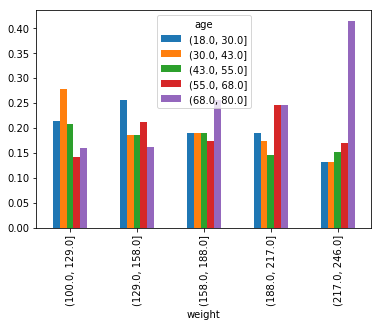

In [0]:
#Visualising relationships between age and weight variables

df_age_weight = pd.crosstab(bins_weight, bins_age, normalize = 'index')

df_age_weight.plot(kind = 'bar')

#Weight and age have confounding relationships. 
#There is no direct dependency in between age and weight except for the age bin 68 to 80. 
#It's most likely because of an unproportionate dataset for this age group.

In [0]:
#Exploring relationships between weight and exercise time variables

bins_weight = pd.cut(df['weight'], 5, precision=0)
bins_exercise_time = pd.cut(df['exercise_time'], 5, precision=0)

pd.crosstab(bins_exercise_time, bins_weight, normalize = 'index')

weight,"(100.0, 129.0]","(129.0, 158.0]","(158.0, 188.0]","(188.0, 217.0]","(217.0, 246.0]"
exercise_time,,,,,
"(-0.0, 60.0]",0.190647,0.158273,0.219424,0.273381,0.158273
"(60.0, 120.0]",0.205696,0.240506,0.294304,0.231013,0.028481
"(120.0, 180.0]",0.318386,0.300448,0.251121,0.130045,0.000000
"(180.0, 240.0]",0.411458,0.385417,0.197917,0.005208,0.000000
"(240.0, 300.0]",0.560209,0.387435,0.052356,0.000000,0.000000


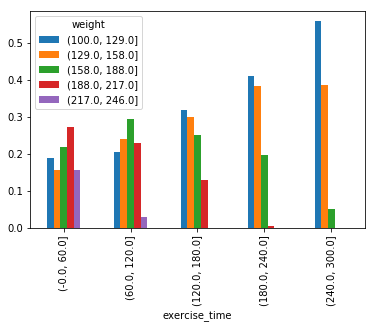

In [0]:
#Visualising relationships between weight and exercise time variables

df_weight_time = pd.crosstab(bins_exercise_time, bins_weight, normalize = 'index')

df_weight_time.plot(kind = 'bar')

#We can see that these variables are related to each other. Less time people spend exercising, heavier weight they are, 
# and the opposite - more time they use exercising - lighter weight they are. But again it can be spurious relationships
#because we don't account a lot of factors - like diet, health issues etc.

In [0]:
#Let's explore the subset of a short period of exercise time and long period of exercise time and its dependency on weight

df_w_t_subset = df_weight_time.iloc[[0,4], :]


df_w_t_subset.head()

weight,"(100.0, 129.0]","(129.0, 158.0]","(158.0, 188.0]","(188.0, 217.0]","(217.0, 246.0]"
exercise_time,,,,,
"(-0.0, 60.0]",0.190647,0.158273,0.219424,0.273381,0.158273
"(240.0, 300.0]",0.560209,0.387435,0.052356,0.000000,0.000000


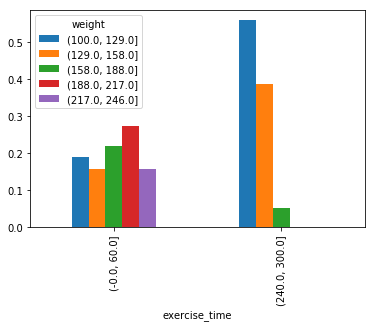

In [0]:
#Visualising the subset

df_w_t_subset.plot(kind='bar')



In [0]:
#Exploring relationships between age and exercise time variables

bins_age = pd.cut(df['age'], 5, precision=0)
bins_exercise_time = pd.cut(df['exercise_time'], 5, precision=0)

pd.crosstab(bins_age, bins_exercise_time, normalize = 'index')

exercise_time,"(-0.0, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
"(18.0, 30.0]",0.203125,0.179688,0.210938,0.238281,0.167969
"(30.0, 43.0]",0.205534,0.217391,0.166008,0.185771,0.225296
"(43.0, 55.0]",0.183857,0.188341,0.174888,0.152466,0.300448
"(55.0, 68.0]",0.207207,0.319820,0.180180,0.184685,0.108108
"(68.0, 80.0]",0.353659,0.414634,0.195122,0.036585,0.000000


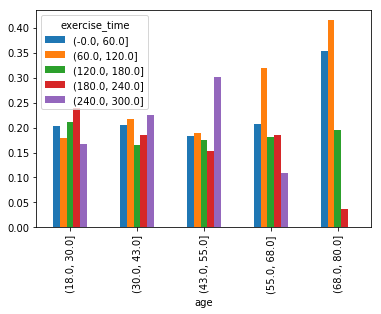

In [0]:
#Visualising relationships between age and exercise time variables

df_age_time = pd.crosstab(bins_age, bins_exercise_time, normalize = 'index')

df_age_time.plot(kind = 'bar')

#We can see that these variables are spuriously related. Older people exercise shorter periods of time. But higher period of time doesn't give you more age.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. 
All variables are continuous numerical variables

2. 
Age and exercise time have a spurious relationship
Same as weight and exercise time.
But age and weight have confounding relationships.

3. Age and exercise time - spurious
Weight and exercise time - real
Age and weight - real, confounding



## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving corr_new.xlsx to corr_new.xlsx


In [0]:
df = pd.read_excel('corr_new.xlsx', index_col='corr', parse_dates=['corr'])
df.head()
df_transpose = df.transpose()

df_transpose.head()

corr,Divorce rate in Maine,Per capita consumption of margarine (US)
2000,5.0,8.2
2001,4.7,7.0
2002,4.6,6.5
2003,4.4,5.3
2004,4.3,5.2


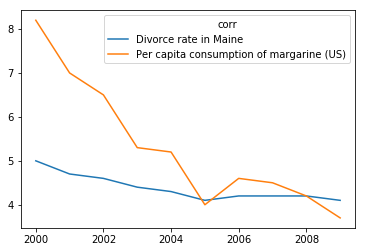

In [0]:
df_transpose.plot()